In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('airline_passenger_satisfaction.csv')
df = pd.DataFrame(data)


In [42]:
# pre-processing

# given the size of the data set, I can drop the 20 rows with the null value in Delay col
df_nn = df.dropna(axis=0)
df = df_nn

# transform target col to binary encoding
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# assign independent and dependent variables
y = df['satisfaction']
x = df.drop('satisfaction', axis=1)

# Select categorical columns that need encoding
categorical_columns = ['Customer Type', 'Type of Travel', 'Class', 'Gender']

# Apply one-hot encoding using Pandas get_dummies()
x_encoded = pd.get_dummies(x, columns=categorical_columns, dtype=int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.25)

# normalise via standardisation
scaler = StandardScaler()

# apply standardisation to independent features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

features = []
for feature in x_encoded:
    if feature == 'satisfaction': continue
    features.append(feature)

# remove satisfaction column
features = features[0:-1]

[('Online boarding', 0.8653765459328063), ('Type of Travel_Business travel', 0.6348617493759477), ('Inflight wifi service', 0.5139605139704381), ('On-board service', 0.4368295321612799), ('Customer Type_Loyal Customer', 0.4336923002346873), ('Checkin service', 0.4258204325917366), ('Leg room service', 0.38857801445347967), ('Cleanliness', 0.3080015240989187), ('Baggage handling', 0.19577952931150017), ('Class_Business', 0.18024165871150707), ('Inflight service', 0.1719403561578584), ('Gate location', 0.10428988323819721), ('Departure Delay in Minutes', 0.09375665539212694), ('Food and drink', 0.06541969046529966), ('Seat comfort', 0.02951941752749944), ('Inflight entertainment', 0.0004414934136798565), ('Gender_Female', -0.003733025731464674), ('Flight Distance', -0.011863779791503675), ('Class_Eco', -0.11839313742066016), ('Class_Eco Plus', -0.12080823717138711), ('Age', -0.14128429443271912), ('Ease of Online booking', -0.20756979606026765), ('Arrival Delay in Minutes', -0.2230986058

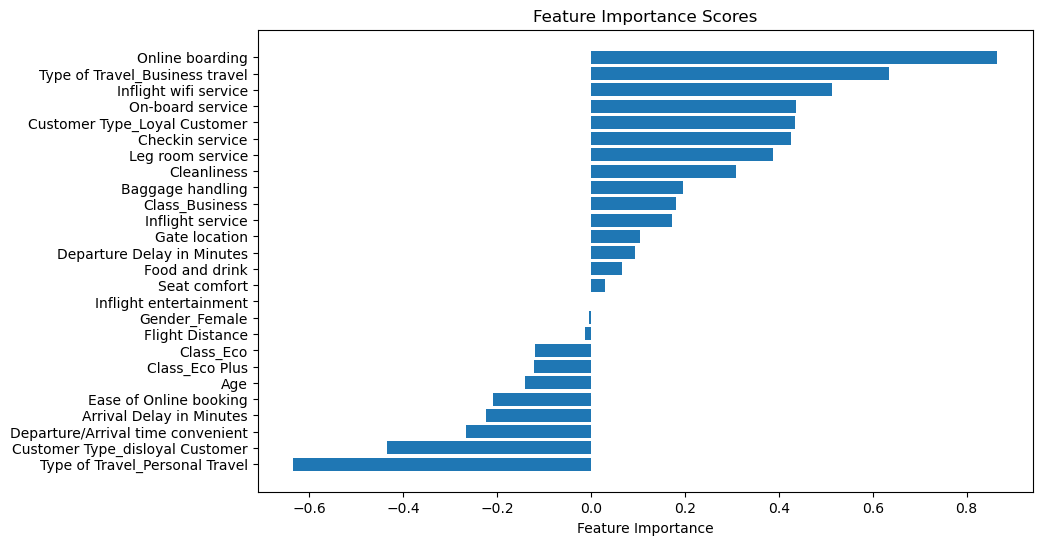

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

feature_importance = logreg.coef_[0]

# Match features to importance scores
feature_importance_dict = dict(zip(features, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)

# Extract feature names and importance scores from sorted_features
features, importance = zip(*sorted_features)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [45]:
# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8708765315739868
Precision: 0.8807785888077859
Recall: 0.8044444444444444
Confusion Matrix:
[[1124   98]
 [ 176  724]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1222
           1       0.88      0.80      0.84       900

    accuracy                           0.87      2122
   macro avg       0.87      0.86      0.87      2122
weighted avg       0.87      0.87      0.87      2122



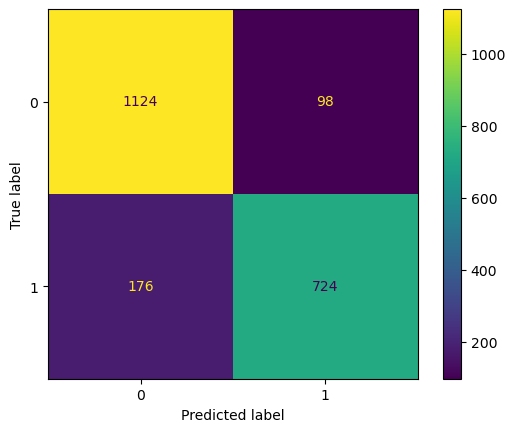

In [46]:
# data visualisation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
dm_display = ConfusionMatrixDisplay(confusion_mat).plot()

